## KNN基础

In [428]:
import numpy as np
import matplotlib.pyplot as plt

In [429]:
# 样本特征
raw_data_X = [[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8]]

# 所属的类别
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [430]:
# 训练集
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [431]:
X_train

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8]])

In [432]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [433]:
X_train[y_train==0, 0]  # 第一个类别的训练集

array([5.1, 4.9, 4.7, 4.6, 5. ])

In [434]:
 X_train[y_train==1, 0]  # 第2个类别的训练集

array([7. , 6.4, 6.9, 5.5, 6.5])

In [435]:
x = np.array([4.6, 3])  # 判断给定样本属于哪一个类？

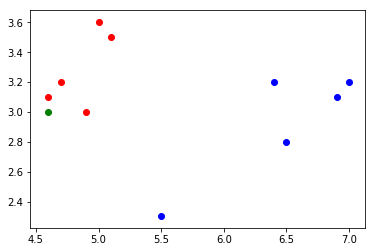

In [437]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red')  # 第一类训练集
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='blue') # 第二类训练集
plt.scatter(x[0], x[1], color='g')  # 从图看应该属于第一类

### KNN 的过程

In [438]:
from math import sqrt   # square root
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [439]:
distances

[0.7071067811865476,
 0.3000000000000007,
 0.22360679774997935,
 0.10000000000000009,
 0.7211102550927981,
 2.4083189157584592,
 1.811077027627484,
 2.3021728866442683,
 1.1401754250991385,
 1.9104973174542803]

In [442]:
# 列表推导式 ，待预测数据与训练集中各样本的距离
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train ]

In [443]:
distances  

[0.7071067811865476,
 0.3000000000000007,
 0.22360679774997935,
 0.10000000000000009,
 0.7211102550927981,
 2.4083189157584592,
 1.811077027627484,
 2.3021728866442683,
 1.1401754250991385,
 1.9104973174542803]

In [444]:
np.argsort(distances)  # 返回距离由近到远的索引， 该索引对应到训练集y_train(类别)中的索引

array([3, 2, 1, 0, 4, 8, 6, 9, 7, 5], dtype=int64)

In [445]:
nearest = np.argsort(distances)
nearest

array([3, 2, 1, 0, 4, 8, 6, 9, 7, 5], dtype=int64)

In [55]:
k = 6

In [58]:
nearest[:6]  # 选前6个

array([3, 2, 1, 0, 4, 8], dtype=int64)

In [59]:
topK_y = [y_train[i] for i in nearest[:6]]  # 根据索引，得到距离x最近的前6个训练样本所对应的类别

In [60]:
topK_y

[0, 0, 0, 0, 0, 1]

In [62]:
from collections import Counter
Counter(topK_y)  # 汇总列表中各元素出现的频次

Counter({0: 5, 1: 1})

In [446]:
votes = Counter(topK_y)

In [447]:
votes.most_common(1)  # 找出得票最多的那个

[(0, 5)]

In [448]:
votes.most_common(1)[0][0]  # 得到x所属的类

0

In [449]:
predict_y = votes.most_common(1)[0][0]  # 预测出的类别y

In [450]:
predict_y

0

## 将以上过程进行封装

In [452]:
%run my_script/KNN.py

In [453]:
predict_y = KNN_Classify(6, X_train, y_train, x)

In [454]:
predict_y

0

In [455]:
predict_y = KNN_Classify(33, X_train, y_train, x)

In [456]:
predict_y

0

In [457]:
x = [7, 2]

In [458]:
predict_y = KNN_Classify(33, X_train, y_train, x)

In [459]:
predict_y

1

## 使用scikit-learn中的kNN

In [460]:
from sklearn.neighbors import KNeighborsClassifier

In [461]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 6)  # 实例化对象

In [462]:
KNN_classifier.fit(X_train, y_train)  # 拟合训练数据集

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [463]:
KNN_classifier.predict(x)

ValueError: Expected 2D array, got 1D array instead:
array=[7 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [464]:
X_predict = np.array(x).reshape(1, -1)

In [465]:
X_predict

array([[7, 2]])

In [466]:
KNN_classifier.predict(X_predict)  # 进行predict预测

array([1])

## 重新整理我们的KNN代码

In [467]:
%run KNN/KNN.py

In [468]:
knn_clf = KNN_Classify(5)  # 实例化一个对象

In [469]:
knn_clf.fit(X_train, y_train)

KNN(k=5)

In [470]:
x = [4, 7]
knn_clf.predict(x)

AttributeError: 'list' object has no attribute 'ndim'

In [471]:
x = np.array([4, 7])
knn_clf.predict(x)

AssertionError: X_predict expected 2D array, got 1D array instead: array=[4 7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample

In [472]:
x = np.array([4, 7]).reshape(1, -1)
knn_clf.predict(x)

array([0])

In [473]:
X_predict = np.array([[2, 4], [7, 2]])
knn_clf.predict(X_predict)

array([0, 1])